<a href="https://colab.research.google.com/github/Ash-bot19/Stock-Price-Movement-Prediction/blob/main/Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import data

In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import sklearn.metrics as metrics

df = yf.download("AAPL", start="2018-01-01", end="2025-01-01")
# Drop the second level of column headers (ticker level)
df.columns = df.columns.get_level_values(0)

# Now check the updated columns
print(df.columns)
print(df.head())

df.describe()

/tmp/ipython-input-2359397032.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Price           Close       High        Low       Open     Volume
Date                                                             
2018-01-02  40.426819  40.436208  39.722764  39.933983  102223600
2018-01-03  40.419781  40.964251  40.356418  40.490187  118071600
2018-01-04  40.607529  40.710791  40.384579  40.492532   89738400
2018-01-05  41.069862  41.156695  40.612227  40.703754   94640000
2018-01-08  40.917320  41.213022  40.818749  40.917320   82271200


Price,Close,High,Low,Open,Volume
count,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03
mean,122.106905,123.317984,120.758553,121.984911,1.001417e+08
std,59.242826,59.713512,58.679691,59.170977,5.521309e+07
min,33.870834,34.711709,33.825574,34.297226,2.323470e+07
25%,54.208107,54.911887,53.821176,54.393594,6.309290e+07
50%,131.703979,133.194655,130.336789,132.167970,8.671200e+07
75%,169.007156,170.567763,167.567977,168.819538,1.214346e+08
max,258.396667,259.474086,257.010028,257.568678,4.265100e+08


In [28]:
df.isnull().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0


EDA

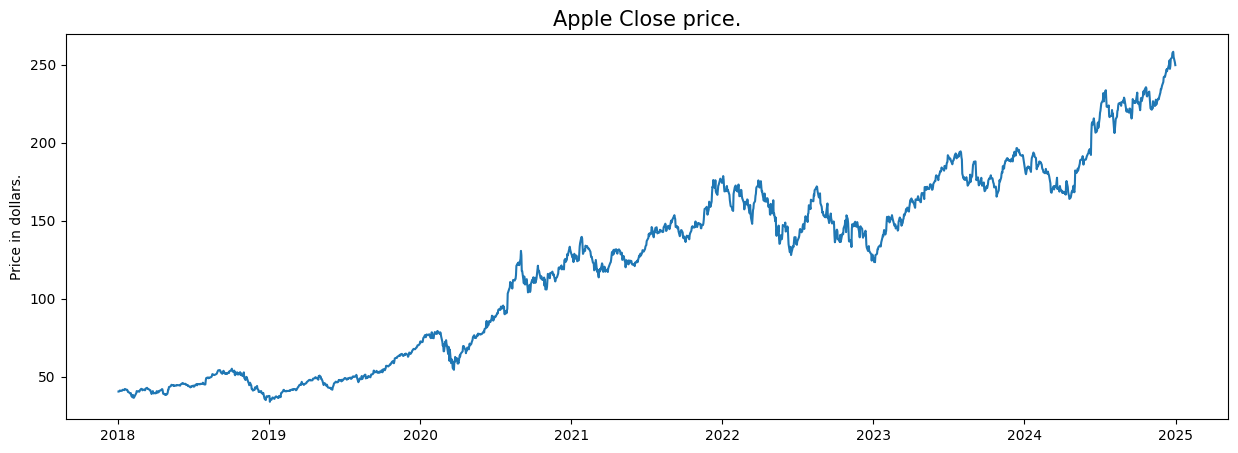

In [29]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Apple Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [30]:
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,40.426819,40.436208,39.722764,39.933983,102223600
2018-01-03,40.419781,40.964251,40.356418,40.490187,118071600
2018-01-04,40.607529,40.710791,40.384579,40.492532,89738400
2018-01-05,41.069862,41.156695,40.612227,40.703754,94640000
2018-01-08,40.917320,41.213022,40.818749,40.917320,82271200


display OHLC data

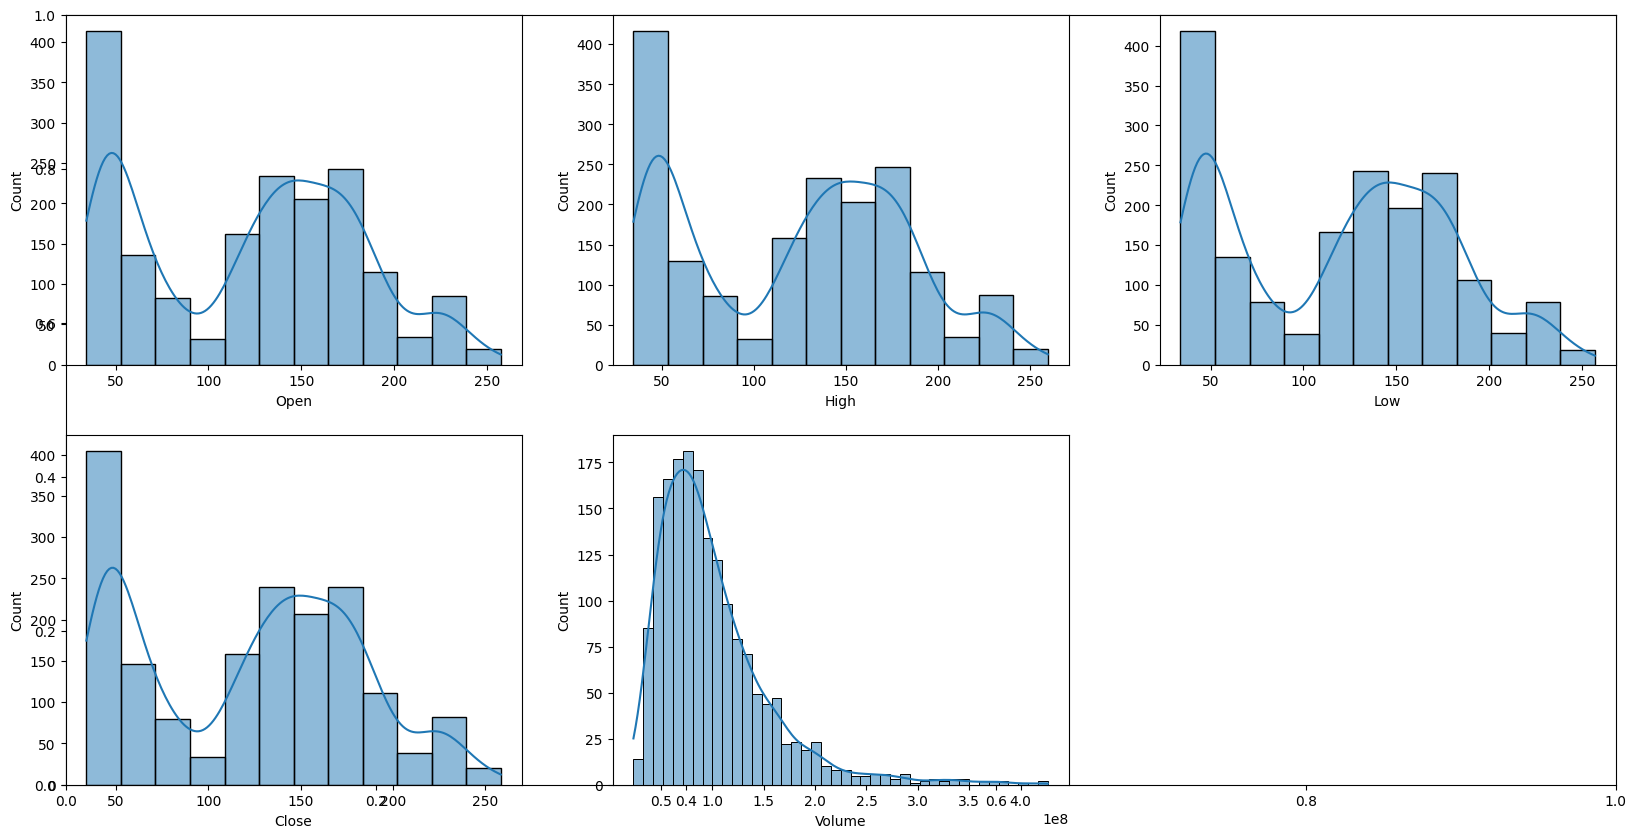

In [31]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.histplot(df[col], kde=True)
plt.show()

Boxdata

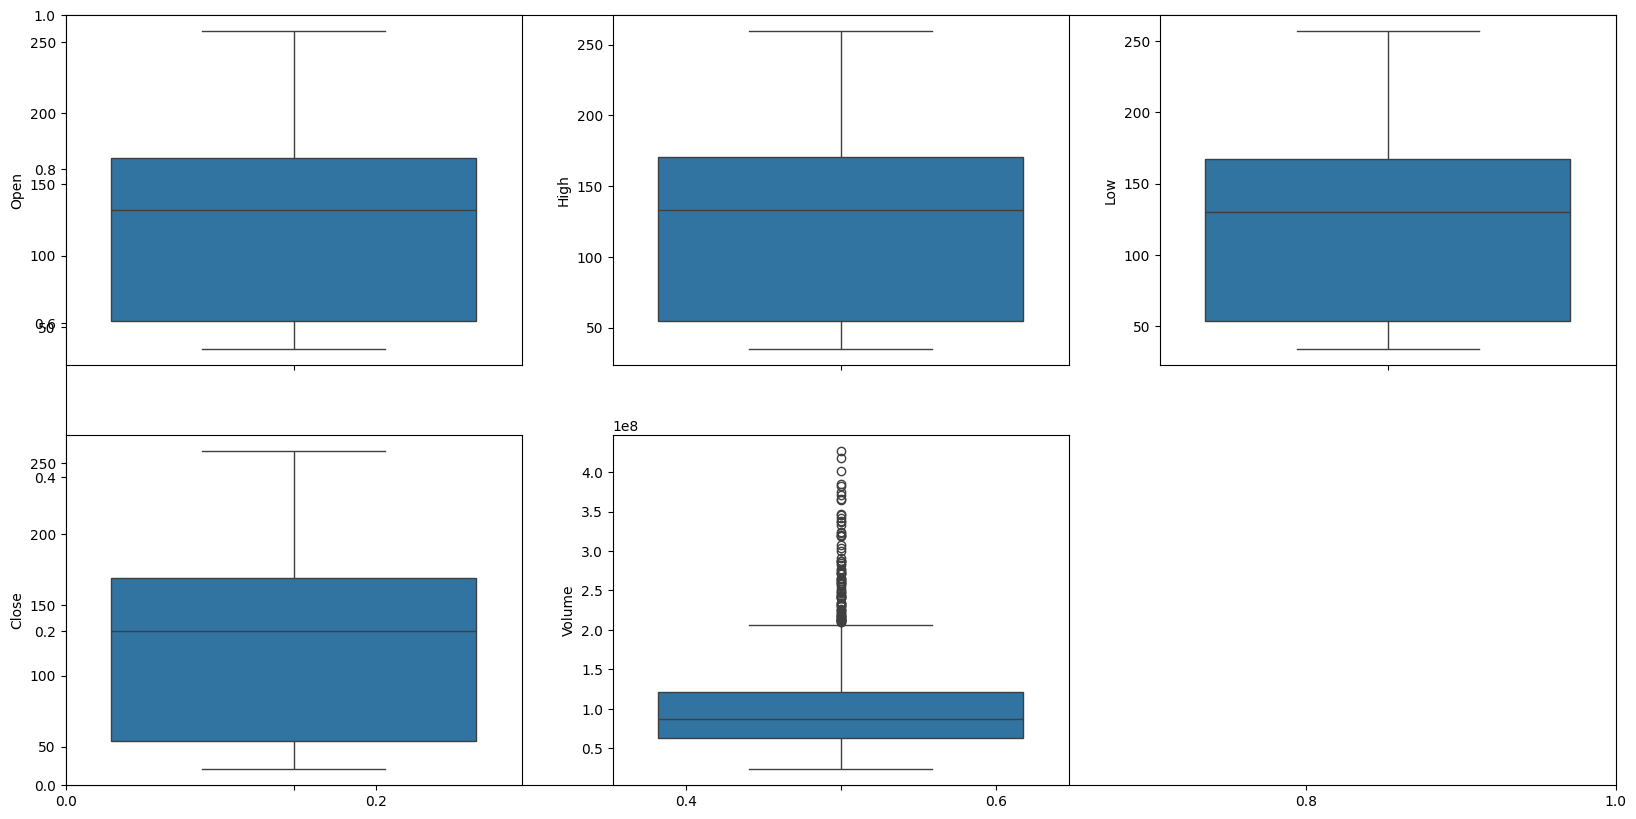

In [32]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

Adding features

In [34]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

display(df.head())

Price,Close,High,Low,Open,Volume,day,month,year
Date,,,,,,,,
2018-01-02,40.426819,40.436208,39.722764,39.933983,102223600,2,1,2018
2018-01-03,40.419781,40.964251,40.356418,40.490187,118071600,3,1,2018
2018-01-04,40.607529,40.710791,40.384579,40.492532,89738400,4,1,2018
2018-01-05,41.069862,41.156695,40.612227,40.703754,94640000,5,1,2018
2018-01-08,40.917320,41.213022,40.818749,40.917320,82271200,8,1,2018


In [35]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

Price,Close,High,Low,Open,Volume,day,month,year,is_quarter_end
Date,,,,,,,,,
2018-01-02,40.426819,40.436208,39.722764,39.933983,102223600,2,1,2018,0
2018-01-03,40.419781,40.964251,40.356418,40.490187,118071600,3,1,2018,0
2018-01-04,40.607529,40.710791,40.384579,40.492532,89738400,4,1,2018,0
2018-01-05,41.069862,41.156695,40.612227,40.703754,94640000,5,1,2018,0
2018-01-08,40.917320,41.213022,40.818749,40.917320,82271200,8,1,2018,0


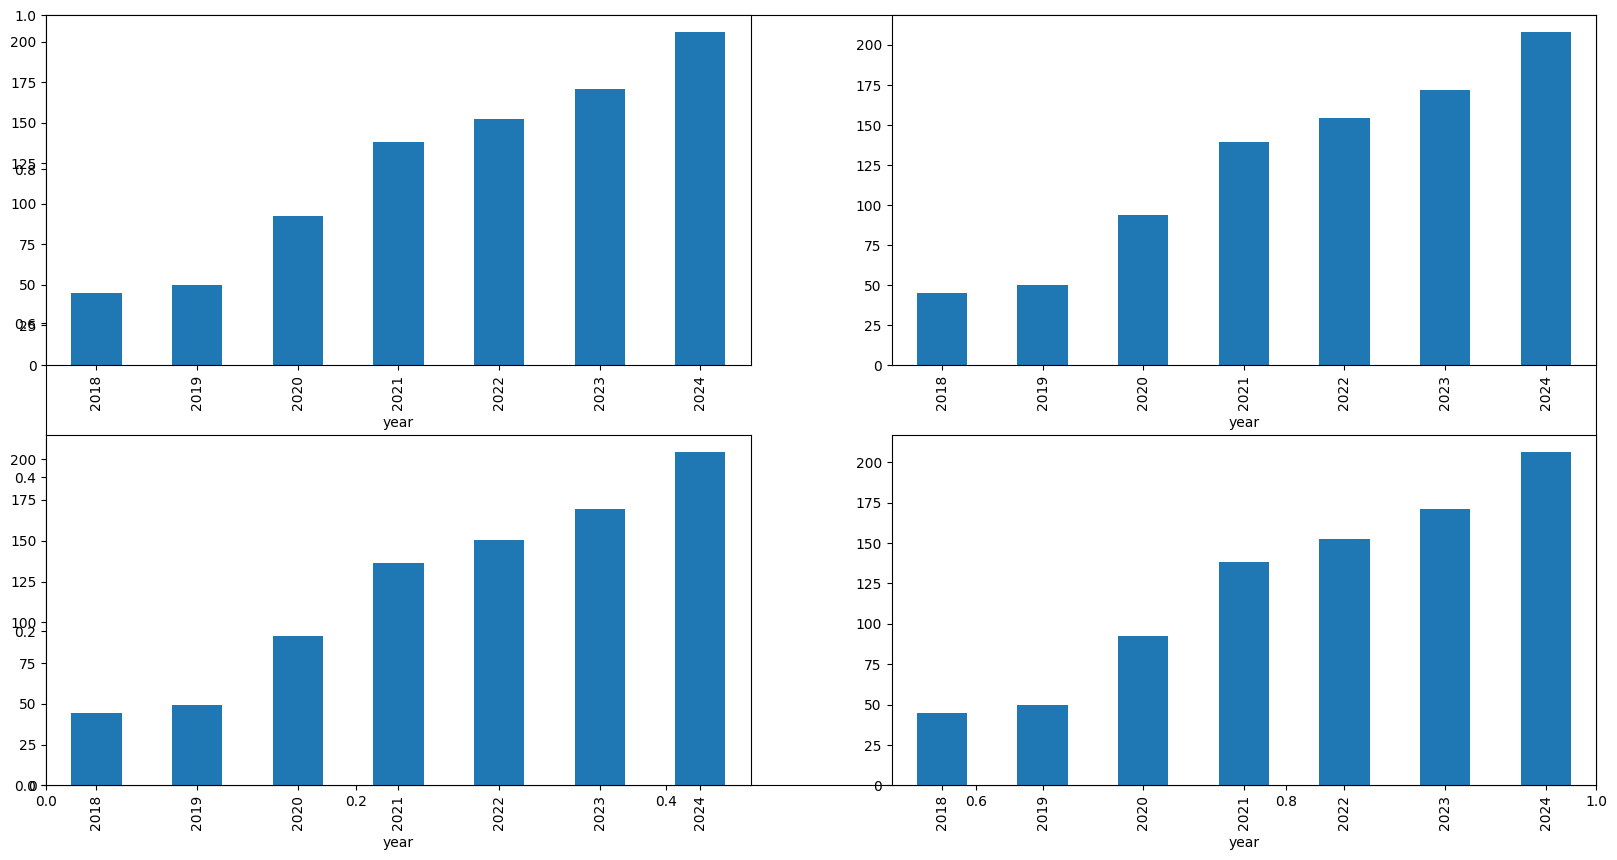

In [38]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [42]:
df.groupby('is_quarter_end').mean()

Price,Close,High,Low,Open,Volume,day,month,year
is_quarter_end,,,,,,,,
0,121.056520,122.193584,119.735744,120.891368,9.654854e+07,15.715503,6.093697,2020.994889
1,124.207676,125.566783,122.804169,124.171997,1.073279e+08,15.751278,7.436116,2021.005111
